In [15]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

import pickle
import time

from sf_q_learning import run_sf_q_learning
from task_learning import run_task_learning

from q_learning import run_q_learning

from task_and_feature_learning import run_task_and_feature_learning

In [16]:
def run_linear_experiments(config):
    """
    Train a successor feature model using hand-crafted transition features and hand-crafted task vectors, and evaluate its performance on a task it hasn't seen before.
    Train a successor feature model using learned transition features and learned task vectors, and evaluate its performance on a task it hasn't seen before.
    Train a Q-learning model to compare how fast it converges relative to the successor feature models.
    All tasks are linear.
    
    Args:
        config (dict): A dictionary specifying parameter configurations

    Returns: None
    """
    

    start_time = time.time()

    # learn successor feature model from learned task vectors and a learned transition feature function
    run_task_and_feature_learning(config)
    
    # learn successor feature model from hand-crafted task vectors and a hand-crafted transition feature function
    run_sf_q_learning(config)
    run_task_learning(config)

    # learn Q-function from hand-crafted task vectors and a hand-crafted transition feature function
    run_q_learning(config)

    print(f'Finished training all models for linear experiments in {(time.time()-start_time)/3600} hours')

    # compare the performance of:
        # the learned successor feature model
        # the hand-crafted successor feature model
        # the Q-function
    # based on the average return of the agent using these models as its policy, and how fast it converges
    
    evaluation_data = {}
    with open('evaluation_data/classic_q_learning.pkl','rb') as file: evaluation_data['q_learning'] = pickle.load(file)
    with open('evaluation_data/task_learning.pkl','rb') as file: evaluation_data['task_learning'] = pickle.load(file)
    with open(f"evaluation_data/task_learning_with_learned_transition_features_of_dimension_{config['task_and_feature_learning']['num_task_features']}.pkl",'rb') as file:
        evaluation_data['task_and_feature_learning'] = pickle.load(file)

    for learning_protocol in evaluation_data: plt.plot(evaluation_data[learning_protocol]['num_sample_transitions'],evaluation_data[learning_protocol]['average_sum_rewards'],label=learning_protocol)
    plt.legend()
    plt.xlabel('Number of sample transitions')
    plt.ylabel('Average sum of rewards over 100 episodes')
    plt.show()
    plt.clf()

In [17]:
if __name__ == '__main__':
    config = { 'gridworld': { 'height': 10,
                              'width': 10,
                              'num_objects': 10,
                              'num_unique_objects': 2,
                              'action_space': range(4),
                              'reward_dynamics': [1,-1] }, # reward for the agent collecting the corresponding object (e.g. [1,-1,0] would mean +1 reward for collecting the first object, -1 and 0 for collecting the others, respectively)
               'sf_q_learning': { 'tasks': [ [1,0], # corresponds to the w-vectors in the paper
                                             [0,1] ], # there will be one policy for each corresponding task
                                  'learning_rate': 1e-4,
                                 'discount_factor': 0.9,
                                 'exploration_threshold': 0.1, # refers to the probability of sampling a random move, as opposed to following the agent's policy
                                 'num_episodes': 1000, # number of episodes to self-play and train
                                 'episode_length': 40, # length of episodes
                                 'interval': 1e2 }, # the interval to save the models and print an update
               'task_learning': { 'num_task_features': 2, # the number of features in the task vector
                                  'learning_rate': 1e-2,
                                  'num_episodes': 1000,
                                  'episode_length': 40,
                                  'interval': 1e2 },
               'q_learning': { 'task': [1,-1], # single task for classical q-learning
                               'learning_rate': 1e-4,
                               'discount_factor': 0.9,
                               'exploration_threshold': 0.1,
                               'num_episodes': 1000,
                               'episode_length': 40,
                               'interval': 1e2 },
               'task_and_feature_learning': { 'num_task_features': 2, # the number of features in the task vector (will also be used to determine phi_tilde function output dimension)
                                              'tf_model_learning_rate': 1e-4,
                                              'task_vector_learning_rate': 1e-3,
                                              'tasks': [ [1,0], # tasks to be used, to learn the transition feature model (equivalent to the phi_tilde function in the paper)
                                                         [0,1], # should match with the sf_q_learning tasks
                                                         [-1,1],
                                                         [1,1]
                                                         ],
                                              'num_episodes': 1000,
                                              'episode_length': 50,
                                              'interval': 1e2,
                                              },
               'model': { 'hidden_units': [64,128], # number of hidden units for each hidden layer respectively
                          'activation_function': nn.ReLU() },
               'evaluate': { 'task': [1,-1], # task to evaluate the generalized policy
                             'num_episodes': 1e2, # number of episodes to average results over
                             'episode_length': 40 }, # length of episodes
               'seed': 1
               }

In [18]:
# set random seeds
np.random.seed(config['seed'])
torch.manual_seed(config['seed'])


========== Learning transition feature model and task vectors ==========
Initial task vector values: [array([0.417022  , 0.72032449]), array([1.14374817e-04, 3.02332573e-01]), array([0.14675589, 0.09233859]), array([0.18626021, 0.34556073])]
Episode: 100	Learned tasks: [array([0.4169405 , 0.70185496]), array([-0.00318369,  0.30305974]), array([0.14046223, 0.08599481]), array([0.17932663, 0.3760622 ])]	Finished in 39.361791372299194 seconds
Total MSE: 792.8390219625609
Episode: 200	Learned tasks: [array([0.42042648, 0.68209129]), array([-0.00219518,  0.2990288 ]), array([0.13528665, 0.08240638]), array([0.16639299, 0.40503603])]	Finished in 40.536049604415894 seconds
Total MSE: 726.1271359665512
Episode: 300	Learned tasks: [array([0.42483486, 0.66454984]), array([0.00208497, 0.29570707]), array([0.12785593, 0.08252034]), array([0.15510933, 0.43601423])]	Finished in 40.6473822593689 seconds
Total MSE: 755.3443751711484
Episode: 400	Learned tasks: [array([0.42932588, 0.65135744]), array(

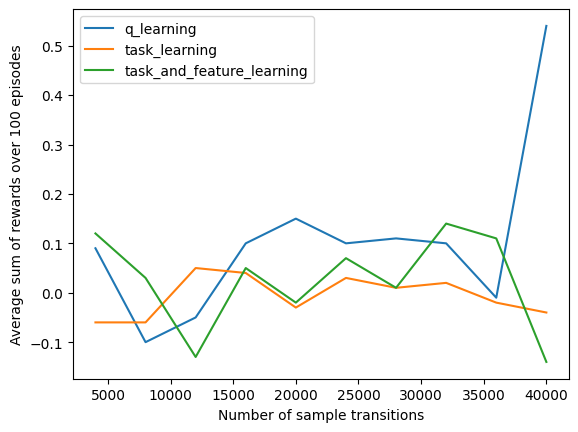

<Figure size 640x480 with 0 Axes>

In [19]:
# run experiments
run_linear_experiments(config)